In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
clear_output()

In [2]:
DATA_DIR = os.path.join('..', '.data', 'micropcb-images')
PROCESSED_DIR = os.path.join('..', 'data', 'cropped_pcbs')
MANUAL_INSPECTION_DIR = os.path.join('..', 'data', 'manual_inspection')

In [38]:
train_bounding_boxes = pd.read_csv(os.path.join(DATA_DIR, 'train_bboxes.csv'))
train_angles = pd.read_csv(os.path.join(DATA_DIR, 'train_angles.csv'))
test_bounding_boxes = pd.read_csv(os.path.join(DATA_DIR, 'test_bboxes.csv'))
test_angles = pd.read_csv(os.path.join(DATA_DIR, 'test_angles.csv'))

display(train_bounding_boxes.head())
display(train_angles.head())

print(f"Training set size: {len(train_bounding_boxes)}")
print(f"Test set size: {len(test_bounding_boxes)}")

,Image,Left,Top,Width,Height
0,AAAA1.jpg,247,171,1457,1647
1,AAAA2.jpg,247,167,1446,1645
2,AAAA3.jpg,247,170,1453,1641
3,AAAA4.jpg,246,166,1461,1642
4,AAAB1.jpg,247,172,1572,2007


,Image,Angle
0,AAAA1.jpg,25.005298
1,AAAA2.jpg,24.640964
2,AAAA3.jpg,24.899956
3,AAAA4.jpg,25.291036
4,AAAB1.jpg,22.865434


Training set size: 6500
Test set size: 1625


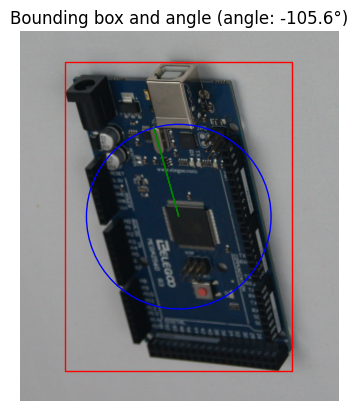

In [40]:
ix = 100
image_path, left, top, width, height = train_bounding_boxes.iloc[ix]
_, angle = train_angles.iloc[ix]
image_path = os.path.join(DATA_DIR, 'train_coded', 'train_coded', image_path)
image = plt.imread(image_path)
angle = np.deg2rad(-angle-90)
plt.imshow(image)
plt.axis('off')
plt.gca().add_patch(plt.Rectangle((left, top), width, height, edgecolor='red', facecolor='none'))
r = min(image.shape[:1]) // 4
plt.gca().add_patch(plt.Circle((left + width / 2, top + height / 2), r, edgecolor='blue', facecolor='none'))
plt.gca().add_patch(plt.Arrow(left + width / 2, top + height / 2, r * np.cos(angle), r * np.sin(angle), width=5, edgecolor='green', facecolor='none'))
plt.title(f'Bounding box and angle (angle: {np.rad2deg(angle):.1f}°)')
plt.show()

1.144335766


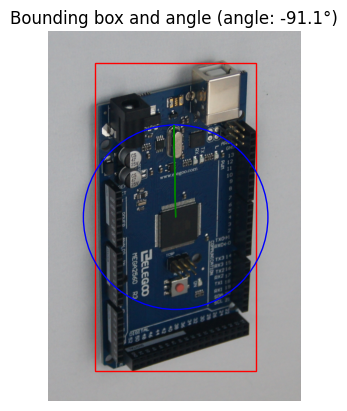

In [60]:
ix = 70
image_path, left, top, width, height = test_bounding_boxes.iloc[ix]
_, angle = test_angles.iloc[ix]
image_path = os.path.join(DATA_DIR, 'test_coded', 'test_coded', image_path)
image = plt.imread(image_path)
print(angle)
angle = np.deg2rad(-angle-90)
plt.imshow(image)
plt.axis('off')
plt.gca().add_patch(plt.Rectangle((left, top), width, height, edgecolor='red', facecolor='none'))
r = min(image.shape[:1]) // 4
plt.gca().add_patch(plt.Circle((left + width / 2, top + height / 2), r, edgecolor='blue', facecolor='none'))
plt.gca().add_patch(plt.Arrow(left + width / 2, top + height / 2, r * np.cos(angle), r * np.sin(angle), width=5, edgecolor='green', facecolor='none'))
plt.title(f'Bounding box and angle (angle: {np.rad2deg(angle):.1f}°)')
plt.show()